# Triple pendulum using Lagrange's equation

In [6]:
%matplotlib inline

In [7]:
import numpy as np
from scipy.integrate import odeint, solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

In [8]:
class TriplePendulum():
    """
    Pendulum class implements the parameters and Lagrange's equations for 
     a simple pendulum (no driving or damping).
     
    Parameters
    ----------
    L1: float
        length of the first pendulum
    L2: float
        length of the second pendulum
    L3: float
        length of the third pendulum
    g : float
        gravitational acceleration at the earth's surface
    mn : float
        mass of pendulum bob, where n is the pendulum bob number

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
    def __init__(self, L1=1., L2=1., L3=1., mass1=1., mass2=1., mass3=1., g=1.
                ):
        self.L1 = L1
        self.L2 = L2
        self.L3 = L3
        self.g = g
        self.m1 = mass1
        self.m2 = mass2
        self.m3 = mass3
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dphi/dt d^2phi/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            A 4-component vector with
            y[0] = theta1 and y[1] = theta2_dot
            y[2] = theta2 and y[3] = theta2_dot
            y[4] = theta3 and y[5] = theta3_dot
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2, theta3, z3 = y

        theta1_dot = z1
        theta2_dot = z2
        theta3_dot = z3

        z1_dot = -((self.g*(self.m2*(self.m2+self.m3)+self.m1*(2*self.m2+self.m3)-self.m1*self.m3*np.cos(2*(theta2-theta3)))*np.sin(theta1)+self.g*self.m2*(self.m2+self.m3)*np.sin(theta1-2*theta2)+2*self.m2*np.sin(theta1-theta2)*((self.m2+self.m3)*(self.L1*np.cos(theta1-theta2)*z1**2+self.L2*z2**2)+self.L3*self.m3*np.cos(theta2-theta3)*z3**2))/(self.L1*(self.m2*(2*self.m1+self.m2)+(self.m1+self.m2)*self.m3-self.m2*(self.m2+self.m3)*np.cos(2*(theta1-theta2))-self.m1*self.m3*np.cos(2*(theta2-theta3)))))
        z2_dot = (self.g*np.cos(theta1)*((2*self.m2*(self.m1+self.m2)+(self.m1+2*self.m2)*self.m3)*np.sin(theta1-theta2)-self.m1*self.m3*np.sin(theta1+theta2-2*theta3))+self.L1*((2*self.m2*(self.m1+self.m2)+(self.m1+2*self.m2)*self.m3)*np.sin(theta1-theta2)-self.m1*self.m3*np.sin(theta1+theta2-2*theta3))*z1**2+self.L2*(self.m2*(self.m2+self.m3)*np.sin(2*(theta1-theta2))-self.m1*self.m3*np.sin(2*(theta2-theta3)))*z2**2+2*self.L3*self.m3*(self.m2*np.cos(theta1-theta3)*np.sin(theta1-theta2)-self.m1*np.sin(theta2-theta3))*z3**2)/(self.L2*(self.m2*(2*self.m1+self.m2)+(self.m1+self.m2)*self.m3-self.m2*(self.m2+self.m3)*np.cos(2*(theta1-theta2))-self.m1*self.m3*np.cos(2*(theta2-theta3))))
        z3_dot = (2*self.m1*np.sin(theta2-theta3)*((self.m2+self.m3)*(np.cos(theta1-theta2)*(self.g*np.cos(theta1)+self.L1*z1**2)+self.L2*z2**2)+self.L3*self.m3*np.cos(theta2-theta3)*(z3)**2))/(self.L3*(self.m2*(2*self.m1+self.m2)+(self.m1+self.m2)*self.m3-self.m2*(self.m2+self.m3)*np.cos(2*(theta1-theta2))-self.m1*self.m3*np.cos(2*(theta2-theta3))))

        return theta1_dot, z1_dot, theta2_dot, z2_dot, theta3_dot, z3_dot
    
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0,
                  abserr=1.0e-9, relerr=1.0e-9):
        """
        Solve the ODE given initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0]
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, 
                             atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot, theta3_0, theta3_dot_0 = solution.y

        return theta1, theta1_dot, theta2, theta2_dot, theta3_0, theta3_dot_0
    
    def calc_E(y):
        """Return the total energy"""
        
        th1, th1d, th2, th2d = y.T
        V = -(m1+m2)*L1*g*mnp.cos(th1)-m2*L2*g*np.cos(th2)
        T = 0.5*m1*(L1*th1d)**2 +0.5*m2*((L1*th1d)**2 + (L2*th2d)**2 +
                2*L1*L2*th1d*th2d*np.cos(th1-th2))
        return T + V

In [9]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [10]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [19]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')


# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 100.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
L3 = 1.
g = 1.
mass1 = 1.
mass2 = 1.
mass3 = 1.

# Instantiate a pendulum 
tp1 = TriplePendulum(L1=L1, L2=L2, L3=L3, g=g, mass1=mass1, mass2=mass2, mass3=mass3)

# Initial condition I

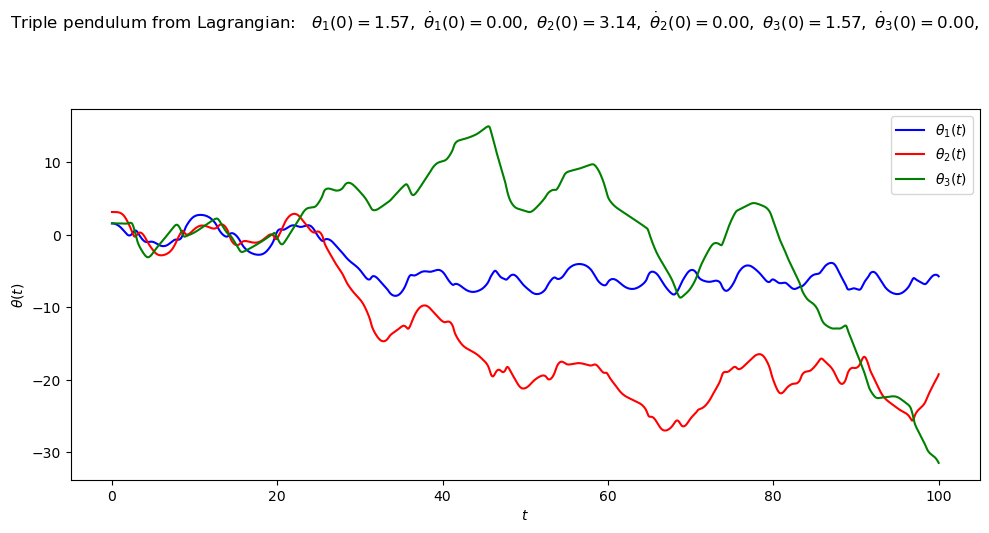

In [20]:
# Choose initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.
theta3_0 = np.pi/2
theta3_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot = \
    tp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Triple pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                rf' $\theta_3(0) = {theta3_0:.2f},$' + \
                rf' $\dot\theta_3(0) = {theta3_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$',  
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$',  
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta3[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='green',
            label=r'$\theta_3(t)$',  
            ax=ax_a) 
                              
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_1.png', bbox_inches='tight')  


# Initial condition II

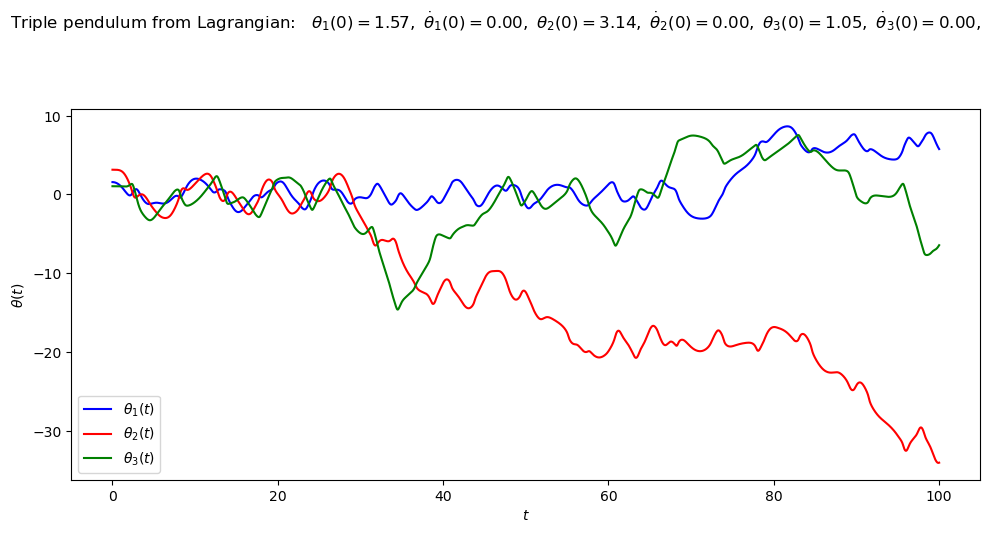

In [21]:
# Choose initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.
theta3_0 = np.pi/3
theta3_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot = \
    tp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Triple pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                rf' $\theta_3(0) = {theta3_0:.2f},$' + \
                rf' $\dot\theta_3(0) = {theta3_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta_1(t)$',  
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='red',
            label=r'$\theta_2(t)$',  
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], theta3[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='green',
            label=r'$\theta_3(t)$',  
            ax=ax_a) 
                              
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_1.png', bbox_inches='tight')  

# $\triangle \theta$ and chaos

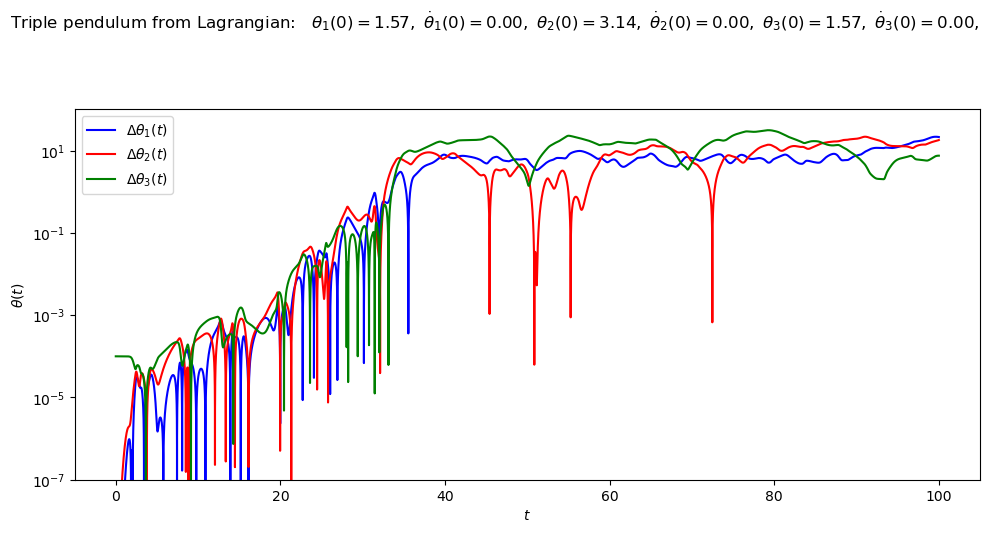

In [22]:
# both plots: same initial conditions
theta1_0 = np.pi/2
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.
theta3_0 = np.pi/2
theta3_dot_0 = 0.

theta1, theta1_dot, theta2, theta2_dot, theta3, theta3_dot = \
    tp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0, theta3_dot_0)
theta1b, theta1b_dot, theta2b, theta2b_dot, theta3b, theta3b_dot = \
    tp1.solve_ode(t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, theta3_0-0.0001, theta3_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Triple pendulum from Lagrangian:  ' + \
                rf' $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf' $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f},$' + \
                rf' $\theta_3(0) = {theta3_0:.2f},$' + \
                rf' $\dot\theta_3(0) = {theta3_dot_0:.2f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: phi plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop]-theta1b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='blue', semilogy=True,
            label=r'$\Delta\theta_1(t)$',  
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop]-theta2b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='red', semilogy=True,
            label=r'$\Delta\theta_2(t)$',  
            ax=ax_a) 
plot_y_vs_x(t_pts[start : stop], np.abs(theta3[start : stop]-theta3b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='green', semilogy=True,
            label=r'$\Delta\theta_3(t)$',  
            ax=ax_a) 
ax_a.set_ylim(1.e-7,100.)
                              
fig.tight_layout()
fig.savefig('double_pendulum_Lagrange_2.png', bbox_inches='tight')  

The Red and Blue graph shows the value of $\Delta\theta_i$ with slightly different initial condition, see the value was close initially, the value is increasing linearly in a expontional graph, this means the value if extremely sensitive to initial conditions, which is a characteristic of chaotic motion.

# Animition

In [25]:
from matplotlib import animation, rc
from IPython.display import HTML

In [26]:
def xy_coords(x0, y0, theta, L):
    
    x = x0 + L * np.sin(theta)
    y = y0 - L * np.cos(theta)
    return x, y

In [27]:
%%capture
x_min = -3.2
x_max = -x_min
y_min = -3.2
y_max = -y_min

fig_anim = plt.figure(figsize=(5, 5), num='Double Pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to pt1_anim and the others,
# we can later change the values.
x0, y0 = 0., 0.
pt0_anim, = ax_anim.plot(x0, y0, 'o', markersize=6,
                        color='black')

x1, y1 = xy_coords(x0, y0, theta1[0], tp1.L1)
pt1_anim, = ax_anim.plot(x1, y1,
                         'o', markersize=12,
                         color='blue')
ln1_anim, = ax_anim.plot([x0, x1], [y0, y1], color='blue', lw=3)
x2, y2 = xy_coords(x1, y1, theta2[0], tp1.L2)
pt2_anim, = ax_anim.plot(x2, y2,
                         'o', markersize=12,
                         color='blue')
ln2_anim, = ax_anim.plot([x1, x2], [y1, y2], color='blue', lw=3)
x3, y3 = xy_coords(x2, y2, theta3[0], tp1.L3)
pt3_anim, = ax_anim.plot(x3, y3,
                         'o', markersize=12,
                         color='blue')
ln3_anim, = ax_anim.plot([x2, x3], [y2, y3], color='blue', lw=3)

x1b, y1b = xy_coords(x0, y0, theta1b[0], tp1.L1)
pt1b_anim, = ax_anim.plot(x1b, y1b,
                         'o', markersize=12,
                         color='red')
ln1b_anim, = ax_anim.plot([x0, x1b], [y0, y1b], color='red', lw=3)
x2b, y2b = xy_coords(x1b, y1b, theta2b[0], tp1.L2)
pt2b_anim, = ax_anim.plot(x2b, y2b,
                         'o', markersize=12,
                         color='red')
ln2b_anim, = ax_anim.plot([x1b, x2b], [y1b, y2b], color='red', lw=3)
x3b, y3b = xy_coords(x2b, y2b, theta3b[0], tp1.L3)
pt3b_anim, = ax_anim.plot(x3b, y3b,
                         'o', markersize=12,
                         color='red')
ln3b_anim, = ax_anim.plot([x2b, x3b], [y2b, y3b], color='red', lw=3)


ax_anim.set_aspect(1)
ax_anim.axis('off')
fig_anim.tight_layout()

In [28]:
def animate_pendulum(i):
    """
    This is the function called by FuncAnimation to create each frame,
    numbered by i. So each i corresponds to a point in the t_pts
    array, with index i.
    """
    
    i_skip = 2 * i
    
    x0, y0 = 0., 0.
    pt0_anim.set_data(x0, y0)
    
    x1, y1 = xy_coords(x0, y0, theta1[i_skip], tp1.L1)
    pt1_anim.set_data(x1, y1)
    ln1_anim.set_data([x0, x1], [y0, y1])
    x2, y2 = xy_coords(x1, y1, theta2[i_skip], tp1.L2)
    pt2_anim.set_data(x2, y2)
    ln2_anim.set_data([x1, x2], [y1, y2])
    x3, y3 = xy_coords(x2, y2, theta3[i_skip], tp1.L3)
    pt3_anim.set_data(x3, y3)
    ln3_anim.set_data([x2, x3], [y2, y3])
    
    x1b, y1b = xy_coords(x0, y0, theta1b[i_skip], tp1.L1)
    pt1b_anim.set_data(x1b, y1b)
    ln1b_anim.set_data([x0, x1b], [y0, y1b])
    x2b, y2b = xy_coords(x1b, y1b, theta2b[i_skip], tp1.L2)
    pt2b_anim.set_data(x2b, y2b)
    ln2b_anim.set_data([x1b, x2b], [y1b, y2b])
    x3b, y3b = xy_coords(x2b, y2b, theta3b[i_skip], tp1.L3)
    pt3b_anim.set_data(x3b, y3b)
    ln3b_anim.set_data([x2b, x3b], [y2b, y3b])
    
    return (pt0_anim, pt1_anim, ln1_anim, pt2_anim, ln2_anim, pt3_anim, ln3_anim,
            pt1b_anim, ln1b_anim, pt2b_anim, ln2b_anim, pt3b_anim, ln3b_anim)

In [31]:
frame_interval = 2. # time between frames
frame_number = 1001 # number of frames to include (index of t_pts)
anim =animation.FuncAnimation(fig_anim,
                              animate_pendulum,
                              init_func=None,
                              frames=frame_number,
                              interval=frame_interval,
                              blit=True,
                              repeat=False)

In [32]:
HTML(anim.to_jshtml()) #animate